In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

import scipy.stats as stats
import pymc as pm
import arviz as az

sns.set_style("whitegrid")

In [2]:
df_train = pd.read_csv(r"train_reg.csv")

In [3]:
X = df_train['x']
y = df_train['y']
x = X - X.mean()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [α, β, ε]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 17 seconds.
/Users/imachome/anaconda3/lib/python3.11/site-packages/arviz/utils.py:185: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
/Users/imachome/anaconda3/lib/python3.11/site-packages/arviz/utils.py:185: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behav

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,16.194,0.167,15.891,16.521,0.002,0.001,12365.0,5984.0,1.0
β,3.081,0.048,2.991,3.172,0.000,0.000,13215.0,6203.0,1.0
ε,1.693,0.121,1.467,1.915,0.001,0.001,9935.0,5652.0,1.0


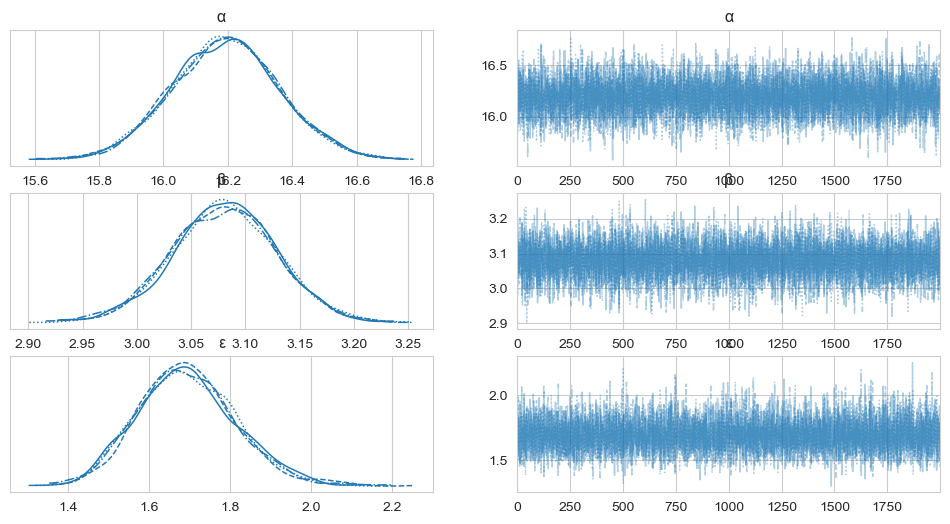

In [4]:
with pm.Model() as model_g:
    α = pm.Normal('α', mu=0, sigma=10)
    β = pm.Normal('β', mu=0, sigma=1)
    ε = pm.HalfNormal('ε', 10)
    μ = pm.Deterministic('μ', α + β * x)
    y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=y)
    trace_g = pm.sample(2000, tune=2000, chains=4, cores=4)

az.plot_trace(trace_g, var_names=['α', 'β', 'ε']);
az.summary(trace_g).head(3)

In [9]:
pm.sample_posterior_predictive(trace_g, model=model_g, random_seed=42, extend_inferencedata=True)

Sampling: [y_pred]


Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

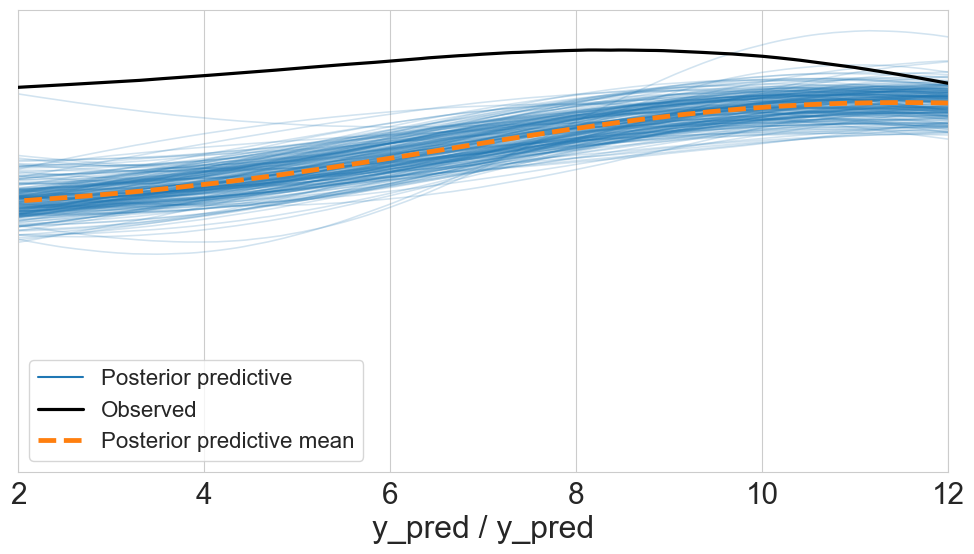

In [10]:
ax = az.plot_ppc(trace_g, num_pp_samples=200, figsize=(12, 6), mean=True)
plt.xlim(2, 12);

In [11]:
# alpha и betta являются восстановленными параметрами линейной регрессии
alpha = az.summary(trace_g).head(3)[:1].mean()[:1].item()
betta = az.summary(trace_g).head(3)[1:2].mean()[:1].item()

In [12]:
df_test = pd.read_csv(r"test_reg.csv")

In [13]:
X_test = df_test['x']

In [14]:
y_pred_test = alpha + betta*X_test

In [15]:
from sklearn.metrics import mean_squared_error
y_true = pd.read_csv('test_Y_true_reg.csv')
mean_squared_error(y_true, y_pred_test)

294.1182226945949